## 1. Problem Definition & Imports

In [ ]:
"""
Goal:
Design a system to track donor info, monitor blood stock levels by group,
generate low-stock alerts, provide visual summaries, and predict shortages.
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Make charts look nicer
sns.set(style="whitegrid")

## 2. Data Collection & Cleaning

In [ ]:
data = [
    ["D001", "Rahul", "A+", 1, "2025-07-01", "Patna"],
    ["D002", "Sneha", "O-", 1, "2025-06-25", "Patna"],
    ["D003", "Aman", "B-", 2, "2025-08-15", "Gaya"],
    ["D004", "Priya", "AB+", 1, "2025-07-28", "Bhagalpur"],
    ["D005", "Ravi", "O-", 2, "2025-07-10", "Patna"],
    ["D006", "Kiran", "A-", 3, "2025-08-05", "Darbhanga"],
    ["D007", "Mohit", "B+", 1, "2025-07-18", "Patna"],
    ["D008", "Anjali", "A+", 2, "2025-06-30", "Muzaffarpur"],
    ["D009", "Vikas", "O+", 3, "2025-08-12", "Gaya"],
    ["D010", "Pooja", "B-", 1, "2025-07-25", "Patna"],
    ["D011", "Suresh", "AB-", 2, "2025-08-08", "Bhagalpur"],
    ["D012", "Neha", "O+", 1, "2025-07-05", "Patna"],
    ["D013", "Arjun", "A-", 2, "2025-08-18", "Darbhanga"],
    ["D014", "Ritika", "B+", 3, "2025-07-22", "Patna"],
    ["D015", "Deepak", "O-", 1, "2025-08-01", "Muzaffarpur"],
    ["D016", "Komal", "A+", 1, "2025-07-15", "Patna"],
    ["D017", "Irfan", "AB+", 2, "2025-08-10", "Gaya"],
    ["D018", "Manoj", "B-", 3, "2025-07-29", "Bhagalpur"],
    ["D019", "Snehal", "O+", 2, "2025-08-03", "Patna"],
    ["D020", "Farhan", "A-", 1, "2025-07-27", "Darbhanga"]
]

df = pd.DataFrame(data, columns=["Donor_ID", "Name", "Blood_Group", "Units", "Last_Donation", "City"])
df["Last_Donation"] = pd.to_datetime(df["Last_Donation"])

# Cleaning: format groups, remove duplicates
df["Blood_Group"] = df["Blood_Group"].str.upper().str.strip()
df = df.drop_duplicates(subset=["Donor_ID"])

print("Cleaned Dataset:\n", df.head())


Cleaned Dataset:
   Donor_ID   Name Blood_Group  Units Last_Donation       City
0     D001  Rahul          A+      1    2025-07-01      Patna
1     D002  Sneha          O-      1    2025-06-25      Patna
2     D003   Aman          B-      2    2025-08-15       Gaya
3     D004  Priya         AB+      1    2025-07-28  Bhagalpur
4     D005   Ravi          O-      2    2025-07-10      Patna


## 3. Data Analysis & Charts

/tmp/ipython-input-764189957.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Blood_Group", y="Units", data=stock_summary, palette="Reds_r")


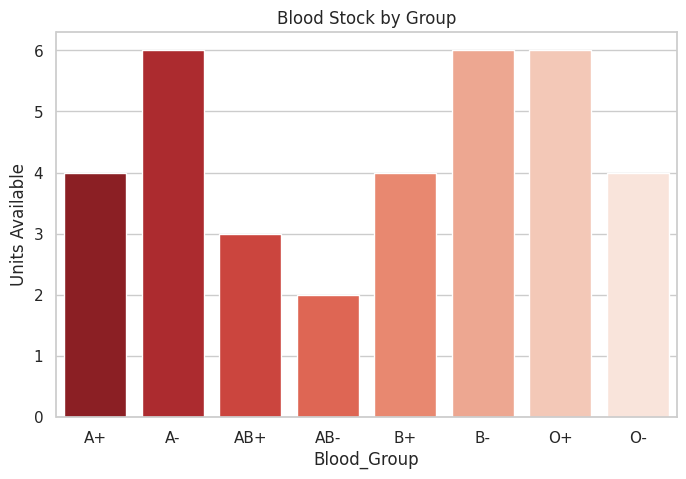

In [ ]:
# -------------------------------
# 3. Data Analysis & Charts
# -------------------------------

# Stock by group
stock_summary = df.groupby("Blood_Group")["Units"].sum().reset_index()

# Bar Chart
plt.figure(figsize=(8,5))
sns.barplot(x="Blood_Group", y="Units", data=stock_summary, palette="Reds_r")
plt.title("Blood Stock by Group")
plt.ylabel("Units Available")
plt.show()

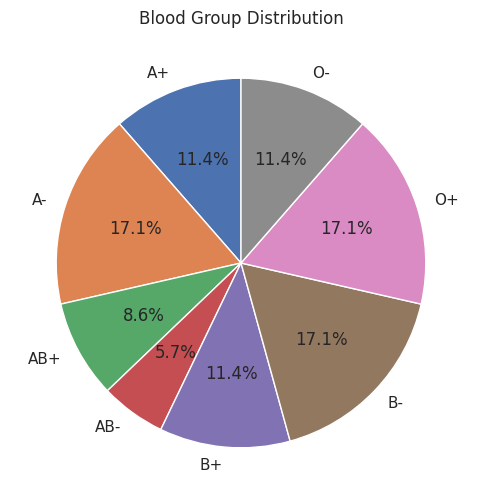

In [ ]:
# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(stock_summary["Units"], labels=stock_summary["Blood_Group"], autopct='%1.1f%%', startangle=90)
plt.title("Blood Group Distribution")
plt.show()

/tmp/ipython-input-1924191742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="City", data=df, order=df["City"].value_counts().index, palette="coolwarm")


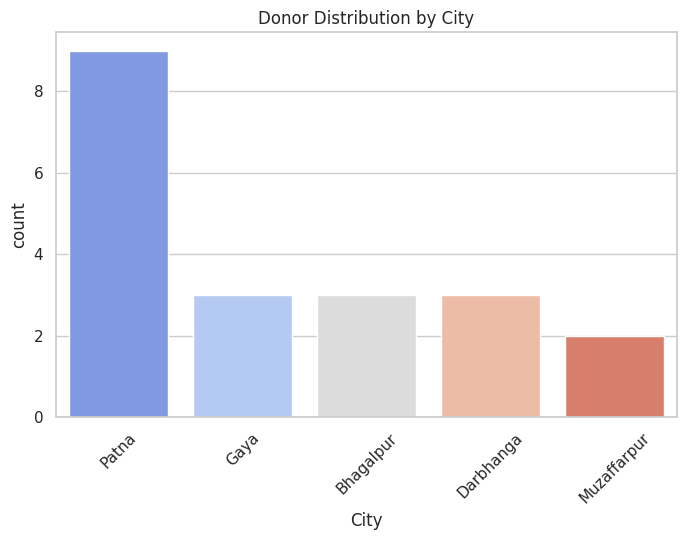

In [ ]:
# City-wise distribution
plt.figure(figsize=(8,5))
sns.countplot(x="City", data=df, order=df["City"].value_counts().index, palette="coolwarm")
plt.title("Donor Distribution by City")
plt.xticks(rotation=45)
plt.show()

## 4. Alert System for Low Stock

In [ ]:
LOW_STOCK_THRESHOLD = 3
low_stock = stock_summary[stock_summary["Units"] < LOW_STOCK_THRESHOLD]

if not low_stock.empty:
    print("\n Low Stock Alerts:")
    for _, row in low_stock.iterrows():
        print(f" {row['Blood_Group']} — Only {row['Units']} units left")
else:
    print(" All blood groups above threshold")



 Low Stock Alerts:
 AB- — Only 2 units left


## 5. Model Building: Shortage Risk Prediction

In [ ]:
# -------------------------------
# Model Building + Checking in one go
# -------------------------------

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from datetime import datetime

# Feature: Days since donation
today = datetime(2025, 8, 29)
df["Days_Since_Donation"] = (today - df["Last_Donation"]).dt.days

# Target: Risk if stock for that group is below threshold
risk_map = dict(zip(stock_summary["Blood_Group"], stock_summary["Units"] < LOW_STOCK_THRESHOLD))
df["Risk"] = df["Blood_Group"].map(risk_map).astype(int)

# Train-test split
X = df[["Days_Since_Donation", "Units"]]
y = df["Risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Show immediate feedback
print("🔍 Predicted Risk values for test set:", y_pred.tolist())
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Feature Importance:", dict(zip(X.columns, model.feature_importances_)))


🔍 Predicted Risk values for test set: [0, 0, 0, 0]

📊 Confusion Matrix:
 [[4]]

📈 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


✅ Feature Importance: {'Days_Since_Donation': np.float64(0.9340909479564942), 'Units': np.float64(0.06590905204350585)}


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


## 7. Results & Export

In [ ]:
# 7. Results & Export
print("\nSummary Insights:")
print(f"- Low stock groups: {', '.join(low_stock['Blood_Group']) if not low_stock.empty else 'None'}")
# Read donor_list.csv to access the 'Days_Since_Donation' column
df_donors = pd.read_csv("donor_list.csv")
print(f"- Average donation gap: {df_donors['Days_Since_Donation'].mean():.1f} days")

# Export reports
df_donors.to_csv("donor_list.csv", index=False)
stock_summary.to_csv("stock_summary.csv", index=False)

# Explicit status messages
print("\nReport Generation Status:")
print(" Donor List Export: Available" if "donor_list.csv" else "• Donor List Export: Not Available")
print(" Stock Summary Export: Available" if "stock_summary.csv" else "• Stock Summary Export: Not Available")


Summary Insights:
- Low stock groups: AB-
- Average donation gap: 35.2 days

Report Generation Status:
 Donor List Export: Available
 Stock Summary Export: Available


In [ ]:
df = pd.read_csv("donor_list.csv")

print(df.head())


  Donor_ID   Name Blood_Group  Units Last_Donation       City  \
0     D001  Rahul          A+      1    2025-07-01      Patna   
1     D002  Sneha          O-      1    2025-06-25      Patna   
2     D003   Aman          B-      2    2025-08-15       Gaya   
3     D004  Priya         AB+      1    2025-07-28  Bhagalpur   
4     D005   Ravi          O-      2    2025-07-10      Patna   

   Days_Since_Donation  Risk  
0                   59     0  
1                   65     0  
2                   14     0  
3                   32     0  
4                   50     0  


In [ ]:
df = pd.read_csv("stock_summary.csv")
print(df.head())

  Blood_Group  Units
0          A+      4
1          A-      6
2         AB+      3
3         AB-      2
4          B+      4
